Demostración del efecto de la discretización --- 6:48 min
===

* 6:48 min | Última modificación: Octubre 7, 2021 | [YouTube](https://youtu.be/t1GwSsDxCOs)

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization_classification.html#sphx-glr-auto-examples-preprocessing-plot-discretization-classification-py

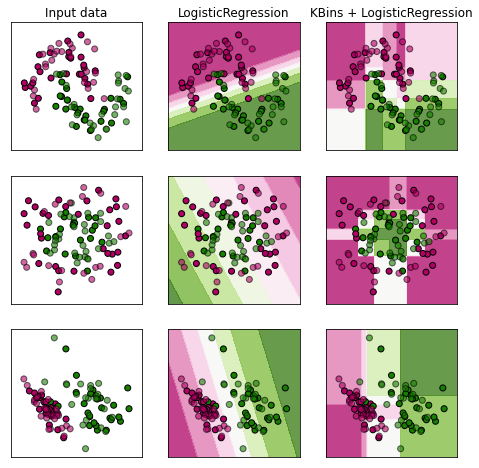

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler

h = 0.02
n_samples = 100

datasets = [
    make_moons(
        n_samples=n_samples,
        noise=0.2,
        random_state=0,
    ),
    make_circles(
        n_samples=n_samples,
        noise=0.2,
        factor=0.5,
        random_state=1,
    ),
    make_classification(
        n_samples=n_samples,
        n_features=2,
        n_redundant=0,
        n_informative=2,
        random_state=2,
        n_clusters_per_class=1,
    ),
]


def plot_scatter(X_train, y_train, X_test, y_test, xx, yy, ax, cmap):

    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap, edgecolors="k")
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))

cm = plt.cm.PiYG
cm_bright = ListedColormap(["#b30065", "#178000"])

for i_dataset, (X, y) in enumerate(datasets):

    #
    # Muestra de datos
    #
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.5, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    ax = axes[i_dataset, 0]

    plot_scatter(X_train, y_train, X_test, y_test, xx, yy, ax, cm_bright)

    if i_dataset == 0:
        ax.set_title("Input data")

    #
    # Modelo de regresión logística
    #
    pipeline = make_pipeline(LogisticRegression(random_state=0))
    param_grid = {"logisticregression__C": np.logspace(-2, 7, 10)}
    gridSearchCV = GridSearchCV(estimator=pipeline, param_grid=param_grid)
    gridSearchCV.fit(X_train, y_train)

    Z = gridSearchCV.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    ax = axes[i_dataset, 1]
    ax.contourf(xx, yy, Z, cmap=plt.cm.PiYG, alpha=0.8)
    plot_scatter(X_train, y_train, X_test, y_test, xx, yy, ax, cm_bright)

    if i_dataset == 0:
        ax.set_title("LogisticRegression")

    #
    # KBinsDiscretizer
    #
    pipeline = make_pipeline(
        KBinsDiscretizer(encode="onehot"),
        LogisticRegression(random_state=0, max_iter=10000),
    )
    param_grid = {
        "kbinsdiscretizer__n_bins": np.arange(2, 10),
        "logisticregression__C": np.logspace(-2, 7, 10),
    }
    gridSearchCV = GridSearchCV(estimator=pipeline, param_grid=param_grid)
    gridSearchCV.fit(X_train, y_train)

    Z = gridSearchCV.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    ax = axes[i_dataset, 2]
    ax.contourf(xx, yy, Z, cmap=plt.cm.PiYG, alpha=0.8)
    plot_scatter(X_train, y_train, X_test, y_test, xx, yy, ax, cm_bright)

    if i_dataset == 0:
        ax.set_title("KBins + LogisticRegression")